# Outline for optimization lecture [Draft]

Reference:
1. J. R. R. Martins & Andrew Ning, Engineering Design Optimization, 2021 - Chapters 1 & 4

For more details on the practical algorithms, see:
1. Nocedal & wright, Numerical Optimization, 2nd ed., 2006

![GOO](./grr.png)


## Introduction (5 min)
1. Link to previous lectures
2. Explain the importance of optimization in ML
   - ML is watered down optimization
   - Training (optimization) + Generalization (We have no idea!)

@Miguel, This has to be made such that it ties in with previous lectures!

## 1. Setting up an optimization problem (10 min)

### Concepts 
- Design/ Decision variables &  their Bounds
- Objective function
- Constraints (Not going to talk much about this)

- Engineering example (Design optimization) vs ML example (regression - abstract meaning of parameters) to illustrate these concepts

### Notes - Section 1.2
In the general case, an optimization problem can be formulated as having the following components:
- Design (or decision ) variables
    - They represent the design space in which the best solution is to be found.
    - They can be physically meaningful (like changing a beam's thickness or area) or can be abstract (neural network weights and biases)
    - They are often bounded by some upper and lower limits but can also be unbounded
- Objective function
    - It is a function of the design variables that results in a scalar value. This is the metric for which the best combination of design variables is to be found. Most often, optimization problems are written as minimization problems for convenience since maximization of a function `f` is just minimizing `-1 * f`
- Constraints
    - Restrictions (other than than the simple bounds) that we place that connects the design variables. They can be either equality or inequality constraints and they are treated separately.
    Treating such constraints alongside your objective makes it a difficult problem that is ofeten solved with specialized algorithms. 

General formulation

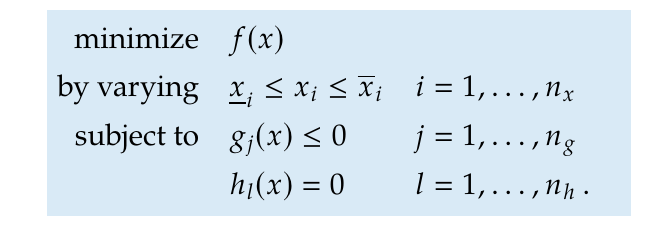

### Concepts
Narrowing our focus to only explain
- Constraints = None ; Unconstrained 
- Objective = Single objective
- Decision variables = Either discrete or continuous

### Notes
- Optimization is vast. So covering all the possible cases is not possible. But by understanding the concepts for a simpler subset, you can read and understand it all by yourself. 
- Let's focus on a small subset of optimization that is relevant to traditional ML
- We will assume that there are no constraints! This results in unconstrained optimization problems which are easier to solve.
- We assume that there is only a single objective. In engineering, this is often not the case and there will be two or more objectives (which are often contradictory) and the engineer would like to get a whole set of solutions that trade off one objective for a gain in the other.
- We assume that descision variable are either going to be discrete or continuous. i.e. We don't consider the cases where the decision variables should be  e.g. integers only.


## 2. Characteristics of optimization problems (10 min)

### Concepts
- Convexity  & modality - global optimum vs local optimum

These are easy to explain and we only need to focus briefly.

### Notes - Section 1.3.3
Now that the optimization problem has been formulated, we need to assess some important characteristics of the formulation, which may make or break optimization in real scenarios.

- Modality & Convexity
    - By now, we have seen what a multi-modal distribution looks like. Functions can be multi-modal or unimodal as well. E.g. see these functions here!
    - The modes can correspond to either a locally optimal solution or a global one and we would like to get the best solution possible which is the global optimum. These points are either local optimum or global optimum or saddle points.

    - If we don't know anythin about the function which we are optimizing for, we would get one solution using some algorithm but we wont be able to say anything about whether that was the global optimum or not. We would have to repeatedly solve the optimization from different initial guesses to get an idea. (This can be expensive and still not be conclusive).
    - It is for this reason that the concept of convexity is important. What it says is that if an optimization problem is convex, then every local minimum is a global minimum. So, once you find one solution, you have pretty much found the best possible case. 
    
    - Convexity is a purely mathematical concept. Geometrically, any set is convex if it does not have a hole inside it. i.e. All points on a line segement that connect any two members of a set should be a part of the set as well. For a function to be convex, the first condition is that its domain has to be a convex set. When we optimize for continuous decision variables in the real space, this is always valid. The second condition is that the line segment joining any two points of th graph of the function has to be above the function itself. In the end, convex functions end up looking like lines or smooth bowls!

    - What about for non-convex problems (most real problems)? Convex analysis forms the basis of many algorithms to solve these problems as well since non-convex functions are often convex near their minima!
    E.g.
    

![](convexity.png)

## 3. Solving optimization problems (20 min)


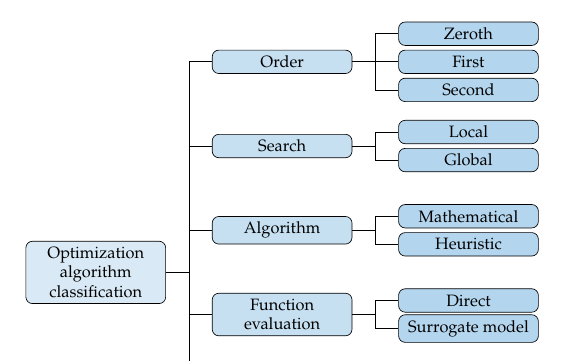

This is going to be the meat of the lecture.
- Main focus will be on the order of information
- The other options are simply mentioned


### Notes - Section 1.4
- Now that we have successfully formulated the optimization problem, we need to solve it.
- There are many ways to solve an optimization problem. The choice of the algorithm depends on the characteristics and the amount of information that is available to us. These algorihms are often called solvers or optimizers.
- Optimizers can be classfied based on the following criteria:
    - Search strategy
        - Local vs Global
        - Based on How the optimizer moves in the decision space. If it is a local optimizer, it is exploitive in a local region near its starting point. If it is a global optimizer, it is explorative and tries to find the best solution in the entire design space. For convex problems or unimodal functions, local optimizers are enough. 
    - Algorithm type
        - Heuristic vs Mathematical
        - Heuristic algorithms are designed based on intuition and often are nature inspired. However, they donot have a mathematical basis and hence the convergence properties are not well understood. Mathematical algorithms are based on mathematical principles (as the name suggests) and hence have well defined convergence properties i.e. they converge to a stationary point. However, they are difficult to design and implement and requires rigourous proofs about their properties and often work for the problems they are designed for. They are also usually more efficient than heuristic algorithms. However, heuristic algorithms are used in practice since they are easy to implement and work well for many problems, since they are quite general. 
    - Order of information
        - Zeroth order vs First order vs Second order
        - This is probably the most important classification. It is based on the amount of information that is available to the optimizer. 



### It all starts with Taylor series expansion!
 - Seeing into the future!

### Notes - Section 4.1.3
    - The taylor series expansion is a way to approximate a function around a point. It is a polynomial expansion of the function around a point. The higher the order of the polynomial, the better the approximation. Lets consider a second order expansion of a function `f(x)` along a direction `p`:

$$ f(x + p) \approx f(x) + \nabla f(x)^T p + \frac{1}{2}p^T H(x) p$$

The terms are as follows:
1. The value of the function at the x (our point of interest) - Zeroth term
2. The gradient of the function - vector of partial derivatives - First order term
    - Generalization of the first-derivative to n dimensions - A vector with the same size as x
    - $$ \nabla f(x) = [\frac{\partial f}{ \partial x_1}, \frac{\partial f}{ \partial x_2} ..., \frac{\partial f}{ \partial x_n} ]$$
    - The gradient points in the direction of the steepest ascent of the function. i.e. the direction in which the function increases the fastest.
3. Hessian -  matrix of second-order derivatives - Second order term
    - Generalization of the second-derivative to n dimensions - A symmetric matrix with size n x n
$$ H(x) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\ \vdots &  \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix} $$
    
- This matrix represents the curvature of the function. 

Optimality criteria
- These conditions are used by mathematical gradient-based optimizers to find the optimum point.
      - In constrained optimization, these conditions are called KKT (Karush-kuhn tucker) conditions and are complicated. In the unconstrained case, it is much simpler.
- The first condition to see whether a point is a local optimum is that the gradient should be zero. i.e. the first order term should be zero. This is because the gradient points in the direction of the steepest ascent of the function. So, if the gradient is zero, the function is not increasing in any direction and hence it is a stationary point. This is to say that at a local optimum, the gradient is zero. However, this is not a sufficient condition. The point could be a local minimum, maximum or a saddle point. To distinguish between these, we need to look at the second order term.
- The Second condition is based on the second order term. If the Hessian is positive definite, implying that it has positive curvature along all directions, then the point is a local minimum. If it is negative definite, then it is a local maximum. If it is indefinite, then it is a saddle point.


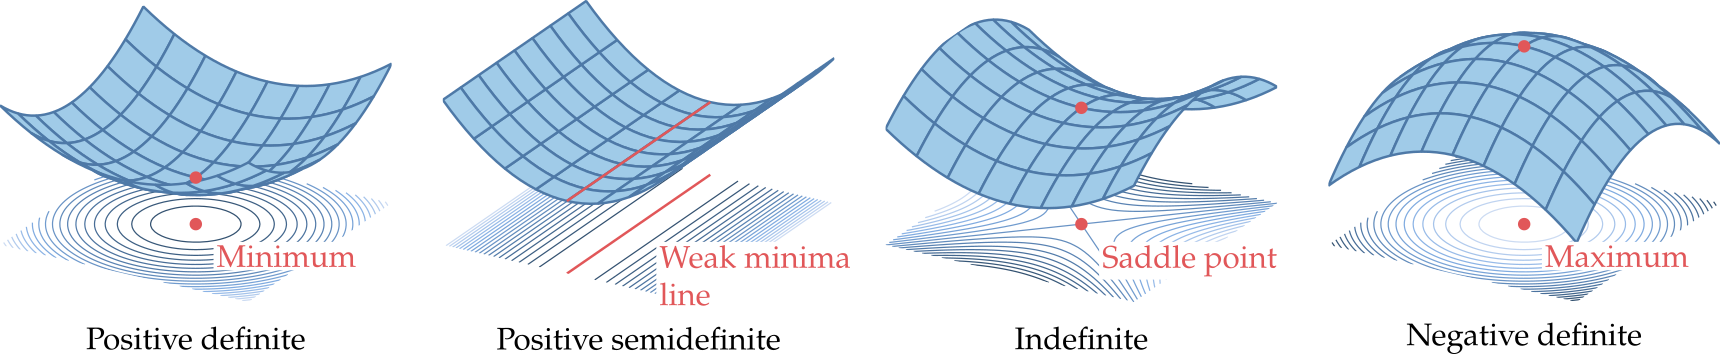

In [3]:
from IPython import display
display.Image("./hessian_stationary_points.png")

### Case 1: Derivative-free optimizers
    - They can only ask for the value of the function at a point
    - When they ask, we show the value of the function at that point
    - Try to figure out the optimum point.


- We use this to explain derivative free methods [0th order methods]
    - Discrete spaces & black box optimization
        - Explain use in hyper-parameter optimization
    - Explain curse of dimensionality and why they dont scale well

In [9]:
import matplotlib.pyplot as plt
import numpy as np


class FunctionPlot():
    """Simple class to manage plotting of a function.

    Allows to plot the function, its first order model and its second order model.
    All of these can be plotted one by one.
    """
    def __init__(self):
        self.count = 0
        self.saved_x = []  # Saved every input received
        self.line = None
        self.random_coeff = np.random.choice(np.arange(-20, 20, 5))  # For the underlying function
        self.show_canvas()

    def underlying_func(self, x):
        """A quadratic function with a random coefficient."""
        return x**2 - self.random_coeff*x + 1

    def gradient(self, x):
        """The gradient of the underlying function."""
        return 2*x - self.random_coeff

    def hessian(self, x):
        return 2

    def first_order_model(self, x, x0):
        """The first order model of the underlying function."""
        return self.underlying_func(x0) + self.gradient(x0)*(x - x0)

    def second_order_model(self, x, x0):
        """The second order model of the underlying function."""
        return self.underlying_func(x0) + self.gradient(x0)*(x - x0) + 0.5*self.hessian(x0)*(x - x0)**2

    def show_canvas(self):
        """Sets up the figure on which to plot."""
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
        ax.set_xlabel('x')
        ax.set_ylabel('y = f(x)')
        ax.set_xlim(-50, 50)
        ax.axvline(x=-45, color='r')  # To show the limit
        ax.axvline(x=45, color='r')
        self.fig = fig
        self.ax = ax

    def plot(self, x_value, with_first_order=False, with_second_order=False):
        """Plots the function, its first order model or its second order model."""
        self.count += 1
        self.saved_x.append(x_value)

        self.ax.plot(self.saved_x,
                         [self.underlying_func(x) for x in self.saved_x], 'bo')

        if with_first_order:
            self._plot_first_order_model()
        elif with_second_order:
            self._plot_second_order_model()
        else:
            pass

        plt.show()

    def _plot_first_order_model(self):
        if self.line is not None:
            self.line.pop(0).remove()
        x = np.linspace(-50, 50, 100)
        y = self.first_order_model(x, self.saved_x[-1])
        self.line = self.ax.plot(x, y, 'b--')

    def _plot_second_order_model(self):
        if self.line is not None:
            self.line.pop(0).remove()
        x = np.linspace(-50, 50, 100)
        y = self.second_order_model(x, self.saved_x[-1])
        self.line = self.ax.plot(x, y, 'b--')

    def plot_minimum(self):
        """Shows the minimum of the function."""
        min_x = self.random_coeff
        min_y = self.underlying_func(min_x)
        self.ax.plot(min_x, min_y, 'x', markersize=20, color='r')

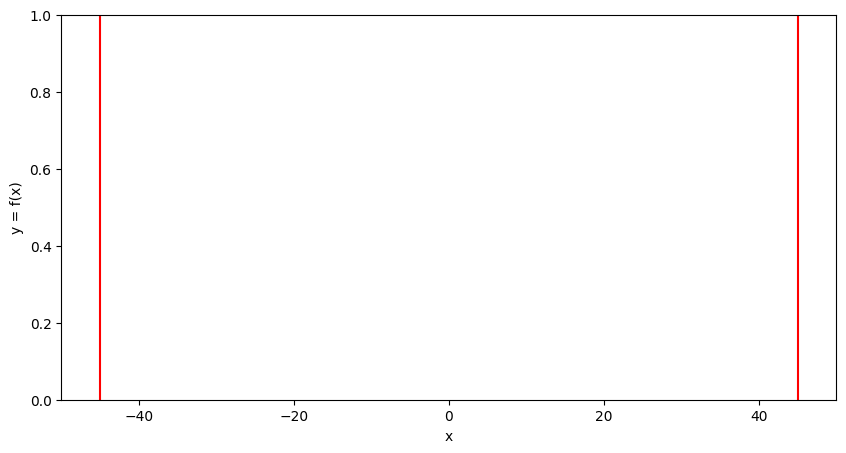

In [10]:
# Create the object separately in a cell
plotter = FunctionPlot()

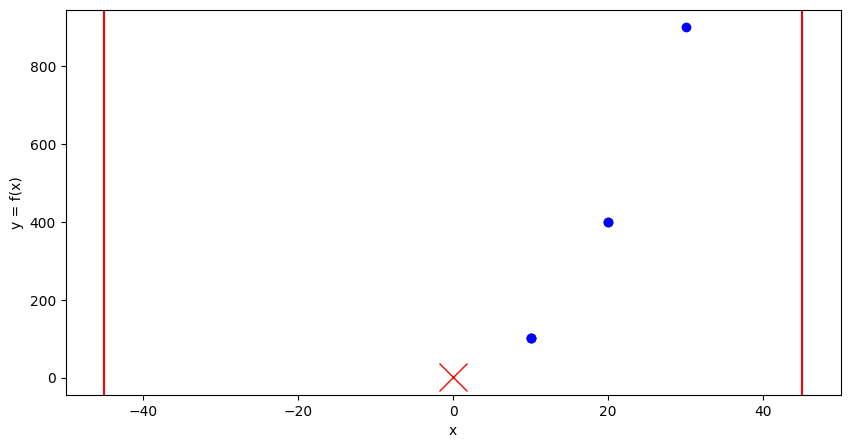

In [11]:
x = 10
plotter.plot(x)
x = 20
plotter.plot(x)
x = 30
plotter.plot(x)
plotter.plot_minimum()
plotter.fig

### Notes - Section 1.4.1
- Zeroth order methods or derivative-free methods
    - These methods are used when we have no information about the function other than its value at a point. This is the case when the function is a black box and we cannot get any information about it.
    - These methods are also used when the decision variables are discrete. In this case, the gradient and the hessian are not defined and hence we cannot use gradient-based methods.
    - However, they are not used in practice for continuous optimization problems since they are not efficient. The number of function evaluations increases exponentially with the increase in dimensionality of the problem. This is called the `curse of dimensionality`.
    - They are used in hyper-parameter optimization for ML models since the decision variables are discrete and the function is a black box.

### Case 2: Gradient-based methods
    - They can ask for the value of the function and the gradient at a point
    - When they ask, we show the value of the function and an arrow 
    - Ask them what step to choose


- We use this to explain gradient based methods [1st order methods]
- Touch on gradient descent (& SGD)
- Explain why GD is bad [ill conditioning and oscillations]
- Talk about momentum (and ADAM?)
- Step size selection
    - Fixed, heuistic, schedules, line-search etc.

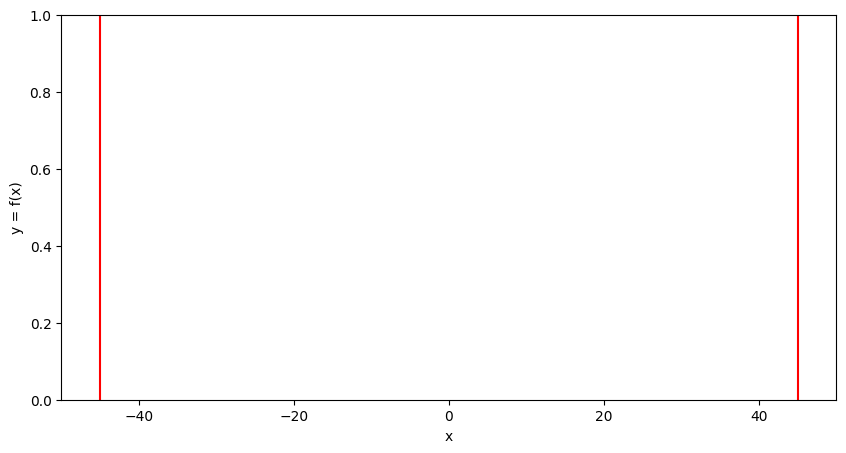

In [12]:
plotter = FunctionPlot()

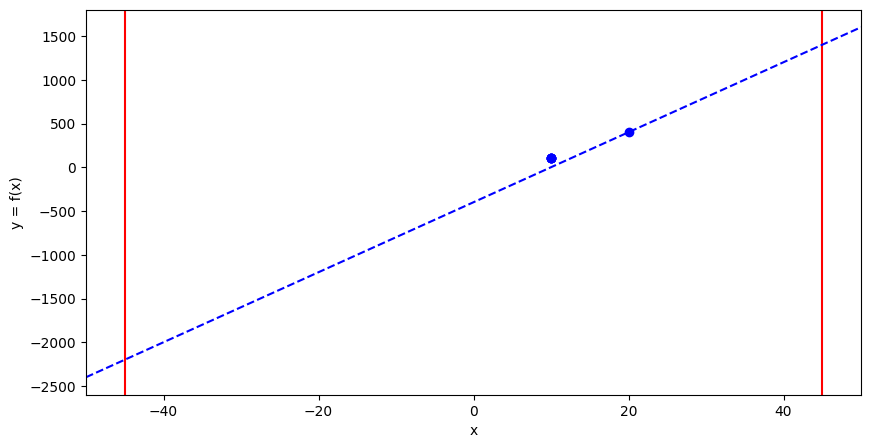

In [14]:
x = 10
plotter.plot(x, with_first_order=True)
x = 20
plotter.plot(x, with_first_order=True)
plotter.fig

### Notes - Section 4.4.1
- Moving against the gradient ensures that we are decresing the function's value most rapidly. The simplest case is gradient descent which has the update rule:
$$ x_{k+1} = x_k - \alpha \nabla f(x_k)$$
- The step size is a hyper-parameter that needs to be chosen. If it is too small, the convergence will be slow. If it is too large, the algorithm will oscillate and may not converge at all.
    - There are many strategies to choose the step size. The simplest is to use a fixed step size. Sometimes people use a step-size schedule where the step size is reduced as the algorithm progresses. Another strategy is to use a line-search algorithm to find the best step size at each iteration. This is the most robust strategy but is also the most expensive since it requires the evaluation of the function at multiple points at each iteration. 
- Pure Gradient descent is not used in practice since it can oscillate when the curvatures along different directions are widely different. Momentum is a technique that is used to speed up convergence and reduce oscillations. It is based on the idea that the gradient at the current point is a good estimate of the gradient at the next point. So, we can use the gradient at the current point to update the next point. This is done by introducing a momentum term `m` which is a fraction of the previous gradient. The update rule becomes:
$$ x_{k+1} = x_k - \alpha m \nabla f(x_k)$$

- The general update rule for gradient-based methods is:
$$ x_{k+1} = x_k - \alpha_k B \nabla f(x_k)$$
where `p_k` is the search direction. For gradient descent, $B = I$. We will see why the steepest descent is not the best direction!

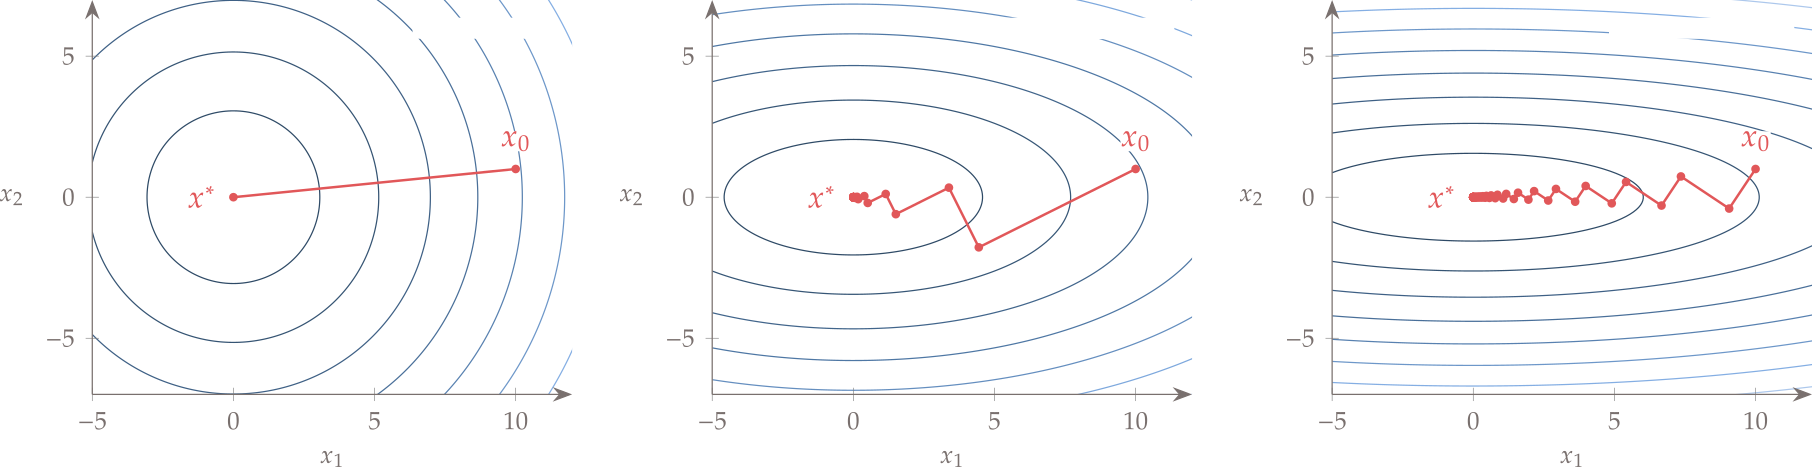

In [5]:
# Widely varying curvature and GD odcillation
from IPython import display
display.Image("./gradient_descent_issue.png")

### Case 3:
    - They can ask for the value of the function, the gradient and Hessian
    - When they ask, we show the value of the function and the quadratic approximation 

- We use this to explain gradient based methods [2nd order methods]
- Single step for quadratic functions
- Costly Hessian
     - Quasi newton - approximated using multiple gradients

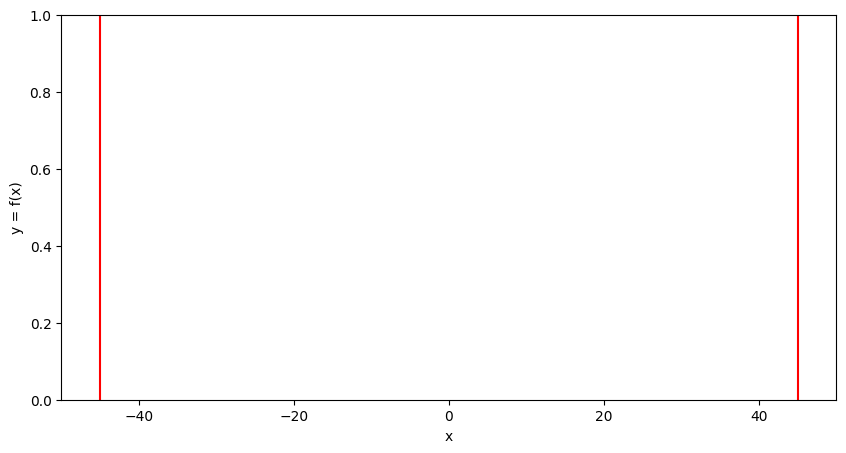

In [15]:
plotter = FunctionPlot()

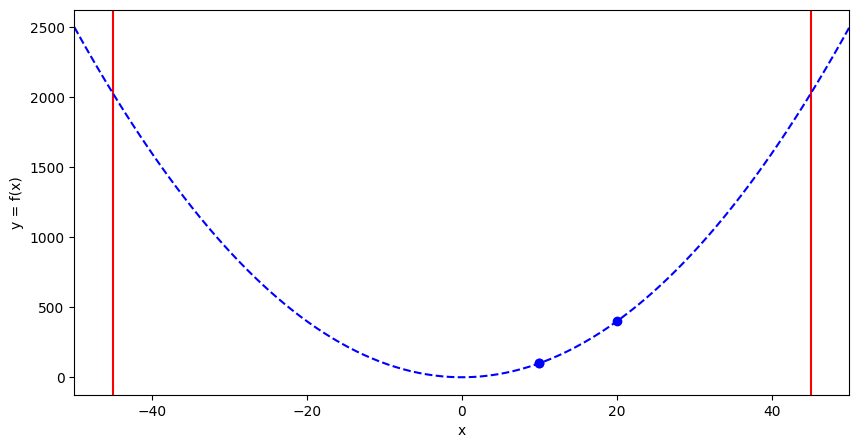

In [16]:
x = 10
plotter.plot(x, with_second_order=True)
x = 20
plotter.plot(x, with_second_order=True)
plotter.fig

### Notes - Section 4.4.2 & 4.4.3
- These are the most powerful methods since they use the most information about the function. They are also the most expensive since they require the evaluation of the Hessian at each iteration.
- The update rule for these methods is:
$$x_{k+1} = x_k - \alpha H^{-1} \nabla f(x_{k-1})$$
- For quadratic functions, this method converges in a single step!. 
- Since the descent direction has to be in the same half plane as the -negative of the gradient, The Hessian has to be positive definite for this method to work. If it is not, then the algorithm will not converge. 
- The Hessian is often expensive to compute. So, we use Quasi-Newton methods which approximate the Hessian using multiple gradients. The most popular method is the BFGS method.
    - BFGS approximation to teh Hessian is builts by storing multiple gradients! 
    - These methods have super-linear convergence properties.

## Concluding remarks (5 min)
- Summary of the lecture
- Gradients are important 
- Next lecture, how are gradients calculated in ML [Autodiff]